https://www.insee.fr/fr/statistiques/serie/000442423#Tableau

# Import dependencies

In [2]:
import pandas as pd
from prophet import Prophet
from enum import Enum
import matplotlib.pyplot as plt

# Loading Dataset and Data Cleaning

In [3]:
df = pd.read_csv("evolutionprixpain.csv",sep=";")
df.head()

,Année,Mois,Valeur
0,2021,Octobre,3.59
1,2021,Septembre,3.59
2,2021,Août,3.59
3,2021,Juillet,3.58
4,2021,Juin,3.58


In [4]:
french_month = {"01": "Janvier", "02": "Février", "03": "Mars", 
"04": "Avril", "05": "Mai", "06": "Juin",
"07": "Juillet", "08": "Août", "09": "Septembre", 
"10": "Octobre", "11": "Novembre", "12": "Décembre"}


for k, v in french_month.items():
    df.loc[df.Mois == v, 'Mois'] = k


df['AAAA-MM'] = df['Année'].astype(str) + "-" + df['Mois'].astype(str)

df.columns.drop(['Année','Mois'])

df.rename(columns={'Valeur': 'Y', 'AAAA-MM': 'DS'})

df.head()


,Année,Mois,Valeur,AAAA-MM
0,2021,10,3.59,2021-10
1,2021,09,3.59,2021-09
2,2021,08,3.59,2021-08
3,2021,07,3.58,2021-07
4,2021,06,3.58,2021-06


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Prix en € label')

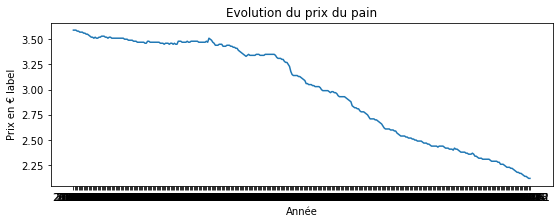

In [15]:
%matplotlib inline

plt.figure(figsize=(9, 3))

plt.plot(df['AAAA-MM'], df['Valeur'])  #problem

plt.title(label="Evolution du prix du pain")
plt.xlabel(xlabel='Année')  
plt.ylabel(ylabel='Prix en € label') 





# Forescast

In [6]:
df_forescast = df[['AAAA-MM', 'Valeur']].copy()
df_forescast.rename(columns={'AAAA-MM': 'ds', 'Valeur': 'y'}, inplace=True, errors='raise')
df_forescast['y'].astype(float)
df_forescast.head()

,ds,y
0,2021-10,3.59
1,2021-09,3.59
2,2021-08,3.59
3,2021-07,3.58
4,2021-06,3.58


In [7]:
m = Prophet()
m.fit(df_forescast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
718,2022-09-27
719,2022-09-28
720,2022-09-29
721,2022-09-30
722,2022-10-01


In [9]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
718,2022-09-27,3.604286,3.585591,3.623897
719,2022-09-28,3.602145,3.583707,3.621075
720,2022-09-29,3.599355,3.579914,3.617718
721,2022-09-30,3.595966,3.577385,3.615484
722,2022-10-01,3.592043,3.571671,3.612331


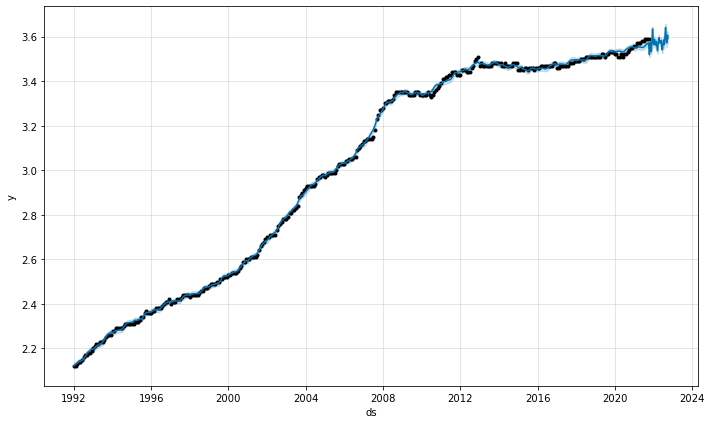

In [10]:
fig1 = m.plot(forecast)

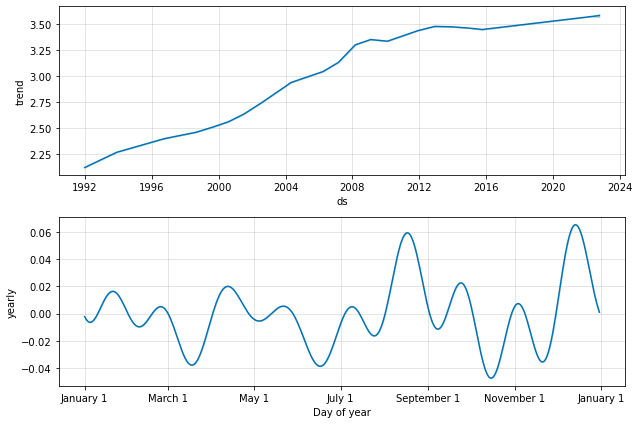

In [11]:
fig2 = m.plot_components(forecast)

In [12]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [13]:
plot_components_plotly(m, forecast)